In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1,6,141)

In [3]:
plot_y = (plot_x-2.5)**2-1

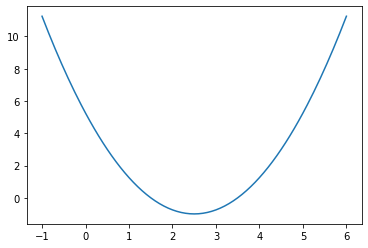

In [4]:
plt.plot(plot_x,plot_y)
plt.show()

In [5]:
# 实现梯度下降法，首先对J求导
def dJ(theta):
    return 2*(theta-2.5)

In [19]:
# 确定损失函数的值J
def J(theta):
    return (theta-2.5)**2-1

In [20]:
# 使用梯度下降法寻找极小值
theta = 0.0
eta = 0.1
epsilon = 1e-8  # 计算机计算精度的问题，直接与0比较，可能永远达不到，所以取1e-8
while True:
    gradient = dJ(theta)  # 求每一点的导数
    last_theta = theta
    theta = theta - eta * gradient  # 每次向导数的负方向移一步
    
    if (abs(J(theta)-J(last_theta))<epsilon):
        break

print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


# 画图

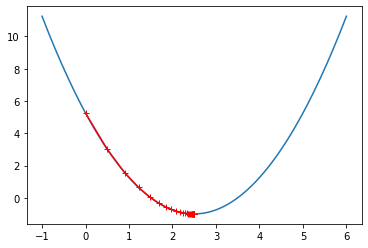

In [21]:
theta = 0.0
eta = 0.1
epsilon = 1e-8  # 计算机计算精度的问题，直接与0比较，可能永远达不到，所以取1e-8
theta_history = [theta]
while True:
    gradient = dJ(theta)  # 求每一点的导数
    last_theta = theta
    theta = theta - eta * gradient  # 每次向导数的负方向移一步
    theta_history.append(theta)
    if (abs(J(theta)-J(last_theta))<epsilon):
        break
    
plt.plot(plot_x,J(plot_x))
plt.plot(np.array(theta_history),J(np.array(theta_history)),color="r",marker="+")
plt.show()

In [22]:
len(theta_history)

46

# 封装函数

In [26]:
def gradient_descent(initial_theta,eta,epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    while True:
        gradient = dJ(theta)  # 求每一点的导数
        last_theta = theta
        theta = theta - eta * gradient  # 每次向导数的负方向移一步
        theta_history.append(theta)
        if (abs(J(theta)-J(last_theta))<epsilon):
            break

def plot_theta_history():
    plt.plot(plot_x,J(plot_x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)),color="r",marker="+")
    plt.show()

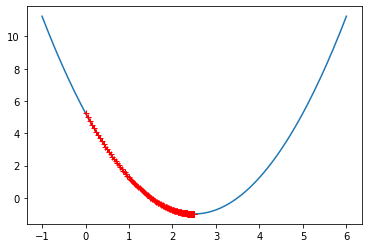

In [27]:
eta = 0.01
theta_history = []
gradient_descent(0.,eta)
plot_theta_history()

In [28]:
# 学习率eta变低了，因此下降的比较密集，需要花费更多的步数
len(theta_history)

424

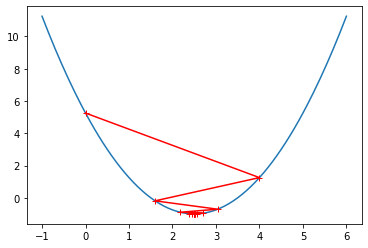

In [29]:
eta = 0.8
theta_history = []
gradient_descent(0.,eta)
plot_theta_history()

In [30]:
eta = 1.1  # eta如果过大的话，会报错
theta_history = []
gradient_descent(0.,eta)
plot_theta_history()

OverflowError: (34, 'Result too large')

In [33]:
# 添加异常检测语句
def J(theta):
    try:
        return (theta-2.5)**2-1.
    except:
        return float('inf')

In [34]:
#  添加异常检测语句后会造成一个死循环
eta = 1.1 
theta_history = []
gradient_descent(0.,eta)
plot_theta_history()

MemoryError: 

In [38]:
# 为避免出现死循环，修改梯度下降法的代码
# 限制最大循环次数为1e4
def gradient_descent(initial_theta,eta,n_iters=1e4,epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta)  # 求每一点的导数
        last_theta = theta
        theta = theta - eta * gradient  # 每次向导数的负方向移一步
        theta_history.append(theta)
        if (abs(J(theta)-J(last_theta))<epsilon):
            break
        
        i_iter+=1

In [39]:
eta = 1.1 
theta_history = []
gradient_descent(0.,eta)

In [40]:
len(theta_history)
# 这样有了最大循环次数之后，就不会造成死循环了

10001

In [41]:
theta_history[-1] # theta取值太大所以最后是nan

nan

#  设置循环次数为10次，绘制图像观察

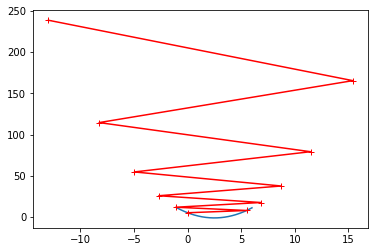

In [43]:
eta = 1.1 
theta_history = []
gradient_descent(0.,eta,n_iters=10)
plot_theta_history()
# 可以看到，J的值是逐渐向上，越来越大的